# Week 12 homework



### 1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning is a data analytics technique that teaches computers to do what comes naturally to humans and animals: learn from experience.

Machine learning should be used when there is a complex task or problem involving a large amount of data and lots of variables, but no existing formula or equation. Some of these situations include when hand-written rules and equations are too complex (face recognition and speech recognition), when the rules of a task are constantly changing (fraud detection), or when the nature of the data keeps changing and the program needs to adapt (automated trading, energy demand forecasting, and predicting shopping trends).

Machine learning is not feasible when trying to solve less complex problems. For less complicated problems, if the rule-based system is giving performance comparable to a machine learning system, then it is advisable to avoid the use of a machine learning system.  

Another reason not to use machine learning is when there is a lack of labeled data and in-house expertise. Most deep learning models require labeled data and an expert team to train the models and put them in production. It is advisable not to use deep learning algorithms to deliver projects if you don’t have enough labeled data and a dedicated team. 

There are 5 key limitations of machine learning – ethics (moving slowing into a stage where humans trust data and algorithms more than personal insights), data (need a good amount of labeled data to train and provide useful insights and predictions, which was mentioned above), interpretability (unable to validate decisions), deterministic system (doesn’t understand the laws of physics – intermediate fields like density having negative numbers), and reproducibility (due to lack of transparency for code and testing methodology).


### 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.



First, read in the csv file, creating a dataframe. Print the head to see what the data looks like and what cleaning might be needed. I think I may have gotten off on the wrong foot. I was cleaning data but thinking that is not what was intended. I'm still leaving the cleaning I've done there but adding some additional things.

In [1]:
# Setup
import pandas as pd
import numpy as np
import re
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import time

loan_df = pd.read_csv("loans_full_schema.csv")
loan_df.head()


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Print the data types to see if something seems out of place. 

In [2]:
print(loan_df.shape)
print(loan_df.dtypes)

(10000, 55)
emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amo

Using replace() function, replace the null annual joint income with zeroes. Then if it's a joint application, use np.where to update the annual joint income to match the annual income.

In [3]:
loan_df['annual_income_joint'].replace(np.NaN,0,inplace=True)
loan_df['annual_income_joint'] = \
np.where(loan_df.annual_income_joint.eq(0) & loan_df.application_type.eq("joint"),loan_df.annual_income,loan_df.annual_income_joint)


Follow the same process for the debt to income joint column.

In [4]:
loan_df['debt_to_income_joint'].replace(np.NaN,0,inplace=True)
loan_df['debt_to_income_joint'] = np.where(loan_df.debt_to_income_joint.eq(0) & \
                                           loan_df.application_type.eq("joint"),loan_df.debt_to_income,loan_df.debt_to_income_joint)

In [5]:
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,NaN,0.00,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,NaN,0.00,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,NaN,0.00,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,NaN,0.00,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Verify nulls are not present for annual_income_joint and debt_to_income_joint

In [6]:
print('annual_income_joint nulls',loan_df['annual_income_joint'].isnull().sum())
print('debt_to_income_joint nulls',loan_df['debt_to_income_joint'].isnull().sum())

annual_income_joint nulls 0
debt_to_income_joint nulls 0


If it was an individual application, set verification_income_joint to Not Verified using np.where.

In [7]:
loan_df.verification_income_joint = np.where(loan_df.application_type.eq("individual"),'Not Verified',loan_df.verification_income_joint)

Leaving multiple columns with null values at this time - basically inferring that nulls are there if the data didn't apply. Changing to zeroes would seem to imply a recent delinquency/bad mark:
months_since_last_delinq,months_since_90d_late,months_since_last_credit_inquiry


Using fillna, update both the num_accounts_120d_past_due and emp_length to zero (from nulls). The generally thinking is there aren't any accounts past due at 120days or else it would be listed. In addition, if the length of time employed was less than a year, 0 was valid for emp_length.

In [8]:
# num_accounts_120d_past_due and emp_length will be set to zero if currently null
loan_df['num_accounts_120d_past_due'] = loan_df['num_accounts_120d_past_due'].fillna(0)
loan_df['emp_length'] = loan_df['emp_length'].fillna(0)

Now check on the number of nulls left.

In [9]:
loan_df.isnull().sum()

emp_title                            833
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                    0
verification_income_joint             40
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In looking at the data, there were 2 different "verified" values in verified_income and verification_income_joint. Updating those using replace().

In [10]:
print(loan_df['verified_income'].value_counts())


Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64


In [11]:
print(loan_df['verification_income_joint'].value_counts())

Not Verified       9116
Source Verified     499
Verified            345
Name: verification_income_joint, dtype: int64


In [12]:
loan_df['verified_income'].replace('Source Verified','Verified', inplace=True)
loan_df['verification_income_joint'].replace('Source Verified','Verified', inplace=True)

In [13]:
print(loan_df['verified_income'].value_counts())
loan_df['verification_income_joint'].value_counts()

Verified        6406
Not Verified    3594
Name: verified_income, dtype: int64


Not Verified    9116
Verified         844
Name: verification_income_joint, dtype: int64

4,646 of the titles had less than 3 with the same title. I had thoughts of filtering some columns out by getting rid of the ones with less than 3 in common, until I saw how many that would be.
Instead, I will try to group them better.

In [14]:
title_cnt = loan_df.groupby('emp_title').filter(lambda x: (x['emp_title'].count()<3).any())

In [15]:
print(title_cnt.shape)

(4646, 55)


In [16]:
loan_df['emp_title'].nunique()

4741

emp_title as nominal values - see what it looks like

In [17]:
class_labels = LabelEncoder()
loan_df['emp_title']=class_labels.fit_transform(loan_df['emp_title'].values)
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1777,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,Not Verified,0.00,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,4675,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,Not Verified,0.00,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,207,3.0,WI,RENT,40000.0,Verified,21.15,0.0,Not Verified,0.00,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1035,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,Not Verified,0.00,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,3710,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Trying pd.factorize on some columns


In [18]:
hold_stack = loan_df[['verified_income','verification_income_joint']].stack()
loan_df[['verified_income','verification_income_joint']] = pd.Series(hold_stack.factorize()[0], index=hold_stack.index).unstack()
print(loan_df.tail())

      emp_title  emp_length state homeownership  annual_income  \
9995       2830        10.0    TX          RENT       108000.0   
9996       1194         8.0    PA      MORTGAGE       121000.0   
9997       4484        10.0    CT      MORTGAGE        67000.0   
9998       2410         1.0    WI      MORTGAGE        80000.0   
9999       2769         3.0    CT          RENT        66000.0   

      verified_income  debt_to_income  annual_income_joint  \
9995              0.0           22.28                  0.0   
9996              0.0           32.38                  0.0   
9997              0.0           45.26             107000.0   
9998              0.0           11.99                  0.0   
9999              1.0           20.82                  0.0   

      verification_income_joint  debt_to_income_joint  ...  sub_grade  \
9995                        1.0                  0.00  ...         A4   
9996                        1.0                  0.00  ...         D3   
9997       

verified_income and verification_income_joint are now floats after using pd.factorize

In [19]:
print(loan_df.dtypes)

emp_title                             int32
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                     float64
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint           float64
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

One Hot encoding on a few of the columns to then use for the correlation matrix (just one view)

In [20]:
one_loan_df = pd.get_dummies(loan_df[['homeownership', 'application_type']])

In [21]:
one_loan_df

,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,application_type_individual,application_type_joint
0,1,0,0,1,0
1,0,0,1,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
...,...,...,...,...,...
9995,0,0,1,1,0
9996,1,0,0,1,0
9997,1,0,0,0,1
9998,1,0,0,1,0


### 3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.



When I first created the heatmap (shown as the first heatmap below), all of the numerical values were still in the dataframe. This made it hard to read. I dropped a number of columns, keeping more "current" or "active" information vs. historical. While it is still pretty busy, it is legible.
- the more numeric fields exist in your dataframe, the harder it will be to see correlation
- the size of the heatmap will have to be increased to accommodate the data and make it easier to read


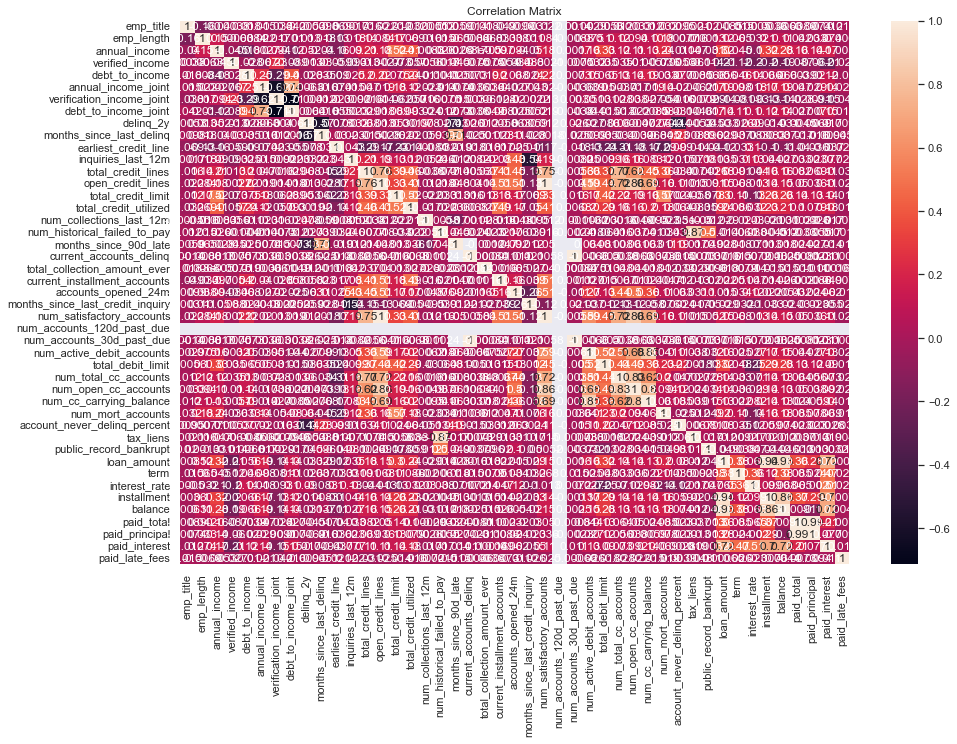

In [22]:

corrMatrix = loan_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})

sns.heatmap(corrMatrix, annot=True).set_title("Correlation Matrix")
plt.show()

Dropping columns to see impact on heat map.


In [23]:
loan_df.drop(columns = ['homeownership', 'total_credit_lines', 'months_since_90d_late','initial_listing_status', 'loan_status', \
                       'term', 'interest_rate', 'installment', 'loan_purpose', 'tax_liens', 'num_open_cc_accounts', \
                        'delinq_2y', 'num_cc_carrying_balance', 'earliest_credit_line', 'total_collection_amount_ever', \
                       'grade', 'sub_grade', 'disbursement_method', 'paid_principal', 'paid_interest','paid_late_fees', \
                       'num_accounts_120d_past_due', 'total_credit_utilized', 'account_never_delinq_percent', \
                        'public_record_bankrupt', 'num_historical_failed_to_pay', 'accounts_opened_24m' ],inplace=True)


In [24]:
loan_df.columns

Index(['emp_title', 'emp_length', 'state', 'annual_income', 'verified_income',
       'debt_to_income', 'annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'months_since_last_delinq',
       'inquiries_last_12m', 'open_credit_lines', 'total_credit_limit',
       'num_collections_last_12m', 'current_accounts_delinq',
       'current_installment_accounts', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_mort_accounts', 'application_type',
       'loan_amount', 'issue_month', 'balance', 'paid_total'],
      dtype='object')

Running correlation matrix again on fewer columns

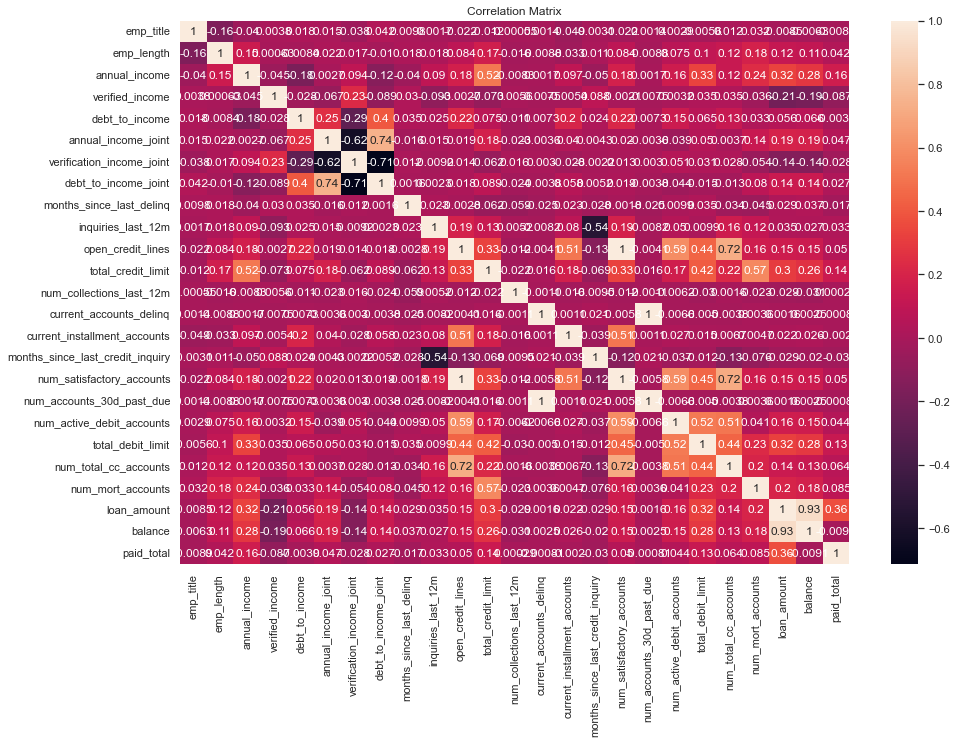

In [25]:
corrMatrix1 = loan_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})

sns.heatmap(corrMatrix1, annot=True).set_title("Correlation Matrix")
plt.show()

Now running for the columns that one hot encoding was done on

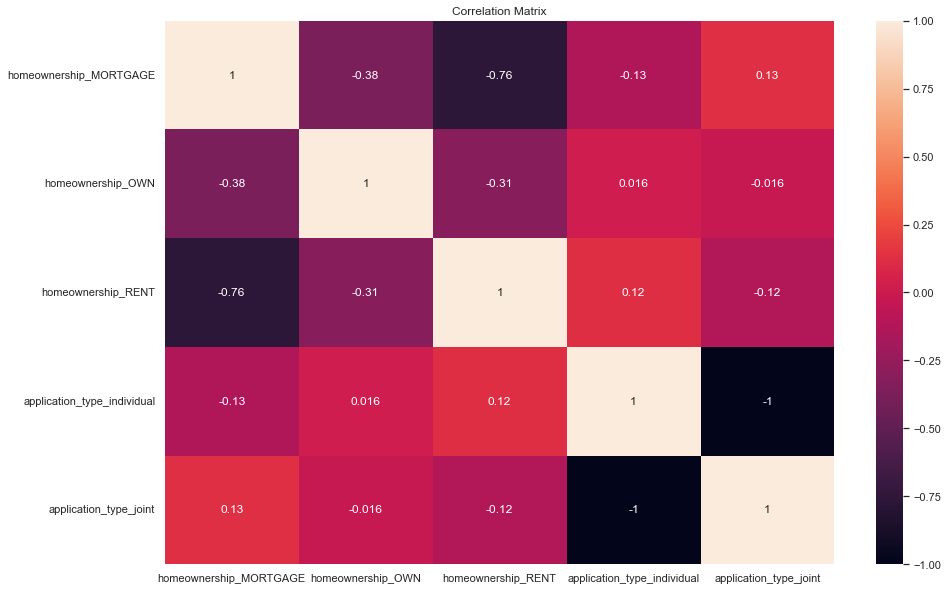

In [26]:
corrMatrix2 = one_loan_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})

sns.heatmap(corrMatrix2, annot=True).set_title("Correlation Matrix")
plt.show()

### 4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

It appears that most of the loans are made for amounts at $15,000 and less. 

Based on research of how to pick the number of bins, larger data sets need larger number of bins, like 20 in this case. Recommendation is to make sure the data set (10000) is divisible by the number of bins. I found the min and max value of the loan amount to use in the range calculation. The range in data here is 39,000 (40,000-1,000) and if I choose 20 bins, my bin size is 39,000/20=1,950

If I follow Sturge’s rule to choose bin sizes, the right number of bins would be almost 15. 


In [27]:
print(loan_df['loan_amount'].min())
print(loan_df['loan_amount'].max())

1000
40000


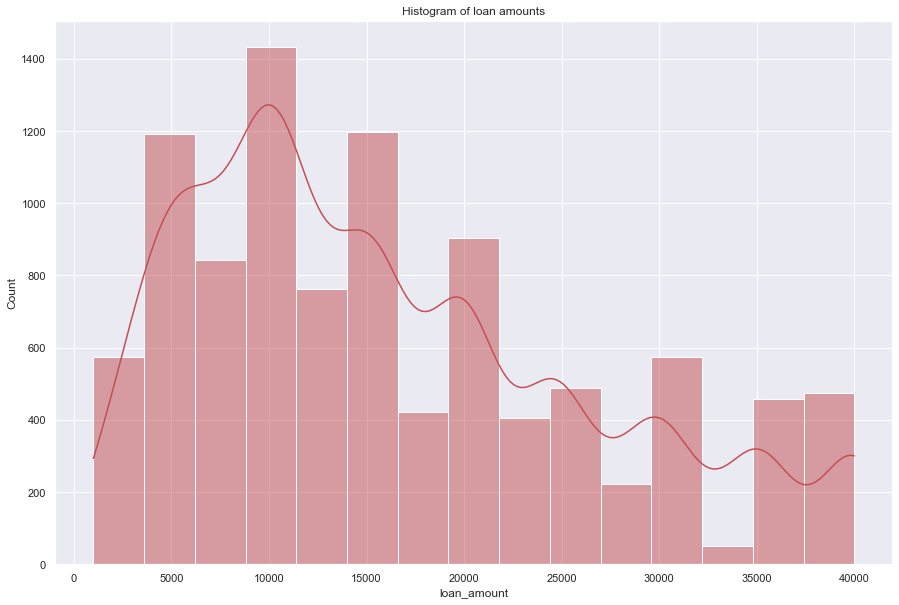

In [28]:
# Plot a simple histogram and kde   

#sns.histplot(loan_df['loan_amount'], kde = True, color = "r").set_title('Histogram of loan amounts')
sns.histplot(loan_df['loan_amount'], kde=True, color = "r",bins=15).set_title('Histogram of loan amounts')
plt.show()

### 5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

- a. Is there a better way to do this than with a lambda?

Lambda definitely seemed more straightforward, once I got the hang of it.  But it seems to not perform as fast as other options I used np.where() statements, which did run faster than the lambda did

- b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

Using the time.perf_counter(), I compared the lambda created with the where() statements. Using where() was faster. Perhaps it was the way I coded the lambda, not sure.


First determine what states are in what regions (found USDA data):
- Pacific West Region states are: Alaska, California, Hawaii, Oregon, Idaho, Nevada, Utah, Arizona, and Washington 

- Plains Region states are: Montana, North Dakota, South Dakota, Wyoming, Nebraska, Kansas, Colorado, Oklahoma, Texas, and New Mexico

- Midwest Region states are: Illinois, Indiana, Michigan, Ohio, Wisconsin, Iowa, Minnesota, Missouri, and Kentucky

- Northest Region states are: Maine, Vermont, New Hamphsire, Massachusetts, Connecticut, Rhode Island, New Jersey, New York, Pennsylvania, West Virginia, Virginia, Delaware, Washington DC, and Maryland

- South Region states are: Florida, Georgia, North Carolina, South Carolina, Alabama, Mississippi, Tennessee, Arkansas, and Louisiana

In [29]:
pacific = ['AK', 'CA', 'HI', 'OR', 'ID', 'NV', 'UT', 'AZ', 'WA']
plains = ['MT', 'ND', 'SD', 'WY', 'NE', 'KS', 'CO', 'OK', 'TX', 'NM']
midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'MN', 'MO', 'KY']
northeast = ['ME', 'VT', 'NH', 'MA', 'CT', 'RI', 'NJ', 'NY', 'PA', 'WV', 'VA', 'DE', 'DC', 'MD']
south = ['FL', 'GA', 'NC', 'SC', 'AL', 'MS', 'TN', 'AR', 'LA']
regions = ['pacific','plains','midwest', 'northeast','south']

Check the performance of the lambda creating the region column. Using nested if statements in the lambda to do all of the updates to region at one time.

In [30]:
beg_timer = time.perf_counter()
loan_df['region'] = loan_df.apply(lambda x: 'pacific' if x['state'] in pacific else ('plains' if x['state'] in plains \
                                 else ('midwest' if x['state'] in midwest else ('northeast' if x['state']in northeast else \
                                                                               'south' if x['state'] in south else np.nan))), axis=1)

end_timer = time.perf_counter()
print(f"lambda update of region ran in {end_timer - beg_timer:0.4f} seconds")

lambda update of region ran in 0.1090 seconds


Show the head of the dataframe to show the region column

In [31]:
loan_df.head()


,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,months_since_last_delinq,...,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_mort_accounts,application_type,loan_amount,issue_month,balance,paid_total,region
0,1777,3.0,NJ,90000.0,0.0,18.01,0.0,1.0,0.00,38.0,...,2,11100,14,1,individual,28000,Mar-18,27015.86,1999.33,northeast
1,4675,10.0,HI,40000.0,1.0,5.04,0.0,1.0,0.00,NaN,...,3,16500,24,0,individual,5000,Feb-18,4651.37,499.12,pacific
2,207,3.0,WI,40000.0,0.0,21.15,0.0,1.0,0.00,28.0,...,3,4300,14,0,individual,2000,Feb-18,1824.63,281.80,midwest
3,1035,1.0,PA,30000.0,1.0,10.16,0.0,1.0,0.00,NaN,...,2,19400,3,0,individual,21600,Jan-18,18853.26,3312.89,northeast
4,3710,10.0,CA,35000.0,0.0,57.96,57000.0,0.0,37.66,NaN,...,10,32700,20,0,joint,23000,Mar-18,21430.15,2324.65,pacific


Run a value_counts() on the region in the dataframe to show how many rows are in each region

In [32]:
loan_df['region'].value_counts()

northeast    2615
pacific      2275
south        2037
midwest      1686
plains       1387
Name: region, dtype: int64

now to find another way of doing this - try the where() function
- Adding a new column first and setting it to nulls.
- Setting up the timer to check the performance of the multiple where() functions
- Print the timing.

In [33]:
loan_df['region2'] = np.nan
beg_timer1 = time.perf_counter()

loan_df['region2']= np.where(loan_df.state.isin(pacific), 'pacific', loan_df.region2)
loan_df['region2']= np.where(loan_df.state.isin(plains), 'plains', loan_df.region2)
loan_df['region2']= np.where(loan_df.state.isin(midwest), 'midwest', loan_df.region2)
loan_df['region2']= np.where(loan_df.state.isin(northeast), 'northeast', loan_df.region2)
loan_df['region2']= np.where(loan_df.state.isin(south), 'south', loan_df.region2)

end_timer1 = time.perf_counter()
print(f"np.where update of region2 ran in {end_timer1 - beg_timer1:0.4f} seconds")

np.where update of region2 ran in 0.0071 seconds


Run a value_counts() on the region in the dataframe to show how many rows are in each region (region2 column)

In [34]:
loan_df['region2'].value_counts()

northeast    2615
pacific      2275
south        2037
midwest      1686
plains       1387
Name: region2, dtype: int64


### 6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.



Create a separate dataframe for each region

The loan amounts due vary by region but not by alot. The min and max for each region are the same and all seem to peak around the same spot.

In [35]:
pacific_loan_df = loan_df[loan_df['region'] == 'pacific']
northeast_loan_df = loan_df[loan_df['region']=='northeast']
south_loan_df = loan_df[loan_df['region'] == 'south']
midwest_loan_df = loan_df[loan_df['region'] =='midwest']
plains_loan_df = loan_df[loan_df['region'] == 'plains']


Print the min and max for each region dataframe to assist with analysis of the data.

In [36]:
print('pacific min', pacific_loan_df['loan_amount'].min())
print('pacific max', pacific_loan_df['loan_amount'].max())
print('northeast min', northeast_loan_df['loan_amount'].min())
print('northeast max', northeast_loan_df['loan_amount'].max())
print('south min', south_loan_df['loan_amount'].min())
print('south max', south_loan_df['loan_amount'].max())
print('midwest min', midwest_loan_df['loan_amount'].min())
print('midwest max', midwest_loan_df['loan_amount'].max())
print('plains min', plains_loan_df['loan_amount'].min())
print('plains max', plains_loan_df['loan_amount'].max())

pacific min 1000
pacific max 40000
northeast min 1000
northeast max 40000
south min 1000
south max 40000
midwest min 1000
midwest max 40000
plains min 1000
plains max 40000


Print the head for each region dataframe to view the data

In [37]:
print(pacific_loan_df.head())
print(northeast_loan_df.head())
print(south_loan_df.head())
print(midwest_loan_df.head())
print(plains_loan_df.head())

    emp_title  emp_length state  annual_income  verified_income  \
1        4675        10.0    HI        40000.0              1.0   
4        3710        10.0    CA        35000.0              0.0   
7        3049        10.0    AZ       110000.0              0.0   
8        2906        10.0    NV        65000.0              0.0   
16       4741         0.0    NV        60000.0              1.0   

    debt_to_income  annual_income_joint  verification_income_joint  \
1             5.04                  0.0                        1.0   
4            57.96              57000.0                        0.0   
7            16.19                  0.0                        1.0   
8            36.48                  0.0                        1.0   
16           31.22                  0.0                        1.0   

    debt_to_income_joint  months_since_last_delinq  ...  total_debit_limit  \
1                   0.00                       NaN  ...              16500   
4                  3

Create subplot histograms of the 5 regions loan amount information.

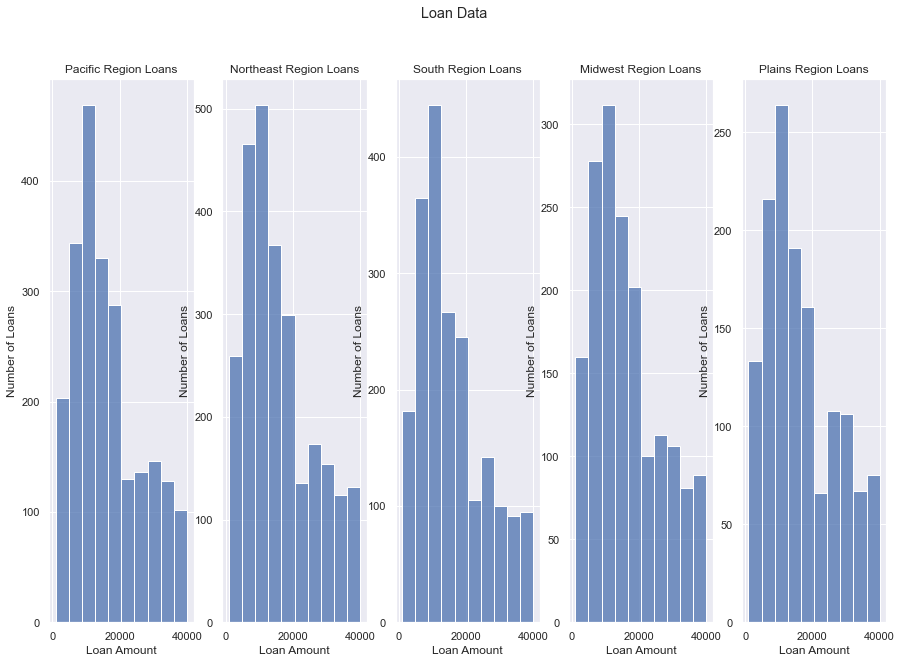

In [38]:
#create 5 histograms in a subplot

fig, ax = plt.subplots(1, 5, figsize=(15,10))

sns.histplot(ax=ax[0], x='loan_amount', data=pacific_loan_df, bins=10)
#set the title and labels for first plot (far left)
ax[0].set_title('Pacific Region Loans')
ax[0].set_ylabel('Number of Loans')
ax[0].set_xlabel('Loan Amount')

sns.histplot(ax=ax[1], x='loan_amount', data=northeast_loan_df, bins=10)
#set the title and labels for second plot 
ax[1].set_title('Northeast Region Loans')
ax[1].set_ylabel('Number of Loans')
ax[1].set_xlabel('Loan Amount')

sns.histplot(ax=ax[2], x='loan_amount', data=south_loan_df, bins=10)
#set the title and labels for third plot
ax[2].set_title('South Region Loans')
ax[2].set_ylabel('Number of Loans')
ax[2].set_xlabel('Loan Amount')

sns.histplot(ax=ax[3], x='loan_amount', data=midwest_loan_df, bins=10)
#set the title and labels for fourth plot
ax[3].set_title('Midwest Region Loans')
ax[3].set_ylabel('Number of Loans')
ax[3].set_xlabel('Loan Amount')

sns.histplot(ax=ax[4], x='loan_amount', data=plains_loan_df, bins=10)
#set the title and labels for fifth plot (far right)
ax[4].set_title('Plains Region Loans')
ax[4].set_ylabel('Number of Loans')
ax[4].set_xlabel('Loan Amount')


#set overall title 
fig.suptitle('Loan Data')
plt.show()

### 7. Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful.

What are some of the ways you handled getting more comfortable with your greatest challenges/areas of opportunity in your career?

Have you changed direction in your career? As in, started in one area and then moved in another direction?

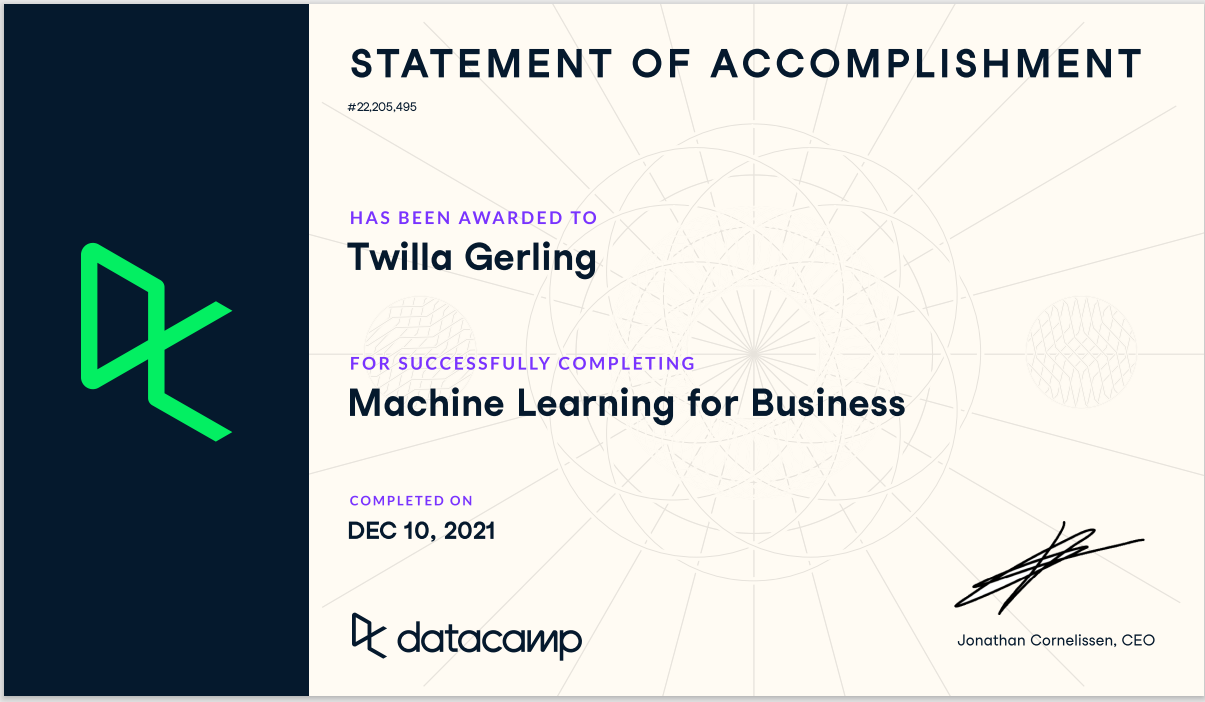

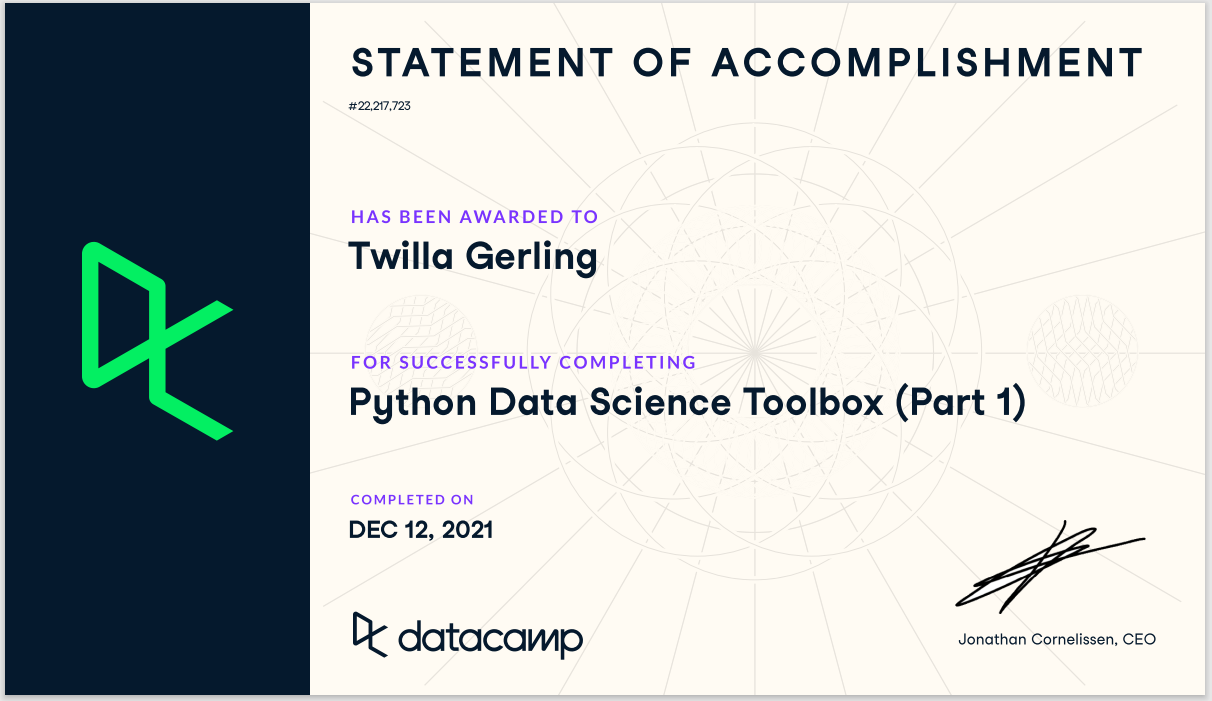